Investment Analysis Assignment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# reading companies and rounds data into two datadrames named companies and rounds2 respectively.
companies = pd.read_csv("companies.txt", sep="\t", encoding='ISO-8859-1')
rounds2 = pd.read_csv("rounds2.csv", encoding='ISO-8859-1')

In [2]:
# Checking the columns of comanies dataframe
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [3]:
# Checking the columns of rounds2 dataframe
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [4]:
# converting permalink column in companies and company_permalink column in rounds2 so that they can be used to merge
rounds2["company_permalink"] = rounds2["company_permalink"].str.lower()
companies["permalink"] = companies["permalink"].str.lower()

In [5]:
# Unique companies in rounds2 list
rounds2["company_permalink"].nunique()

66370

In [6]:
# Unique comapnies in Companies list
companies["permalink"].nunique()

66368

In [7]:
# Merging Comapnies dataframe with rounds2 dataframe to form master_frame
master_frame = rounds2.merge(companies, how="left", left_on="company_permalink", right_on="permalink")

#Converting entire master_frame to lowercase (only for string type data)
master_frame = master_frame.applymap(lambda x: x.lower() if type(x) == str else x)

In [8]:
#Number of observations(rows) in master_frame (We can also use len(master_frame))
master_frame.shape[0]

114949

In [9]:
#Checking the Columns of master_frame
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,b,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,media,operating,ind,16,mumbai,mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,a,14-10-2014,NaN,/organization/-qounter,:qounter,http://www.qounter.com,application platforms|real time|social network...,operating,usa,de,de - other,delaware city,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:qounter,http://www.qounter.com,application platforms|real time|social network...,operating,usa,de,de - other,delaware city,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,b,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,apps|games|mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,a,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,curated web,operating,chn,22,beijing,beijing,01-01-2007


In [10]:
#Checking the master_frame info
print(master_frame.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
 6   permalink                114942 non-null  object 
 7   name                     114941 non-null  object 
 8   homepage_url             108810 non-null  object 
 9   category_list            111535 non-null  object 
 10  status                   114942 non-null  object 
 11  country_code             106271 non-null  object 
 12  state_code               104003 non-null  object 
 13  region                   104782 non-null  object 
 14  city

In [11]:
#Checking the percentage of null values in each column
round((((master_frame.isnull().sum())/len(master_frame.index))*100),2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.01
name                        0.01
homepage_url                5.34
category_list               2.97
status                      0.01
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.86
dtype: float64

In [12]:
#Checking if any row has all the vlues missing
master_frame.isnull().all(axis=1).sum()

0

In [13]:
#Deleting column funding_round_code which is missing 72 percent of values and other columns which are not going give any insight for this analysis
master_frame = master_frame.drop('funding_round_code', axis=1)
master_frame = master_frame.drop('state_code', axis=1)
master_frame = master_frame.drop('region', axis=1)
master_frame = master_frame.drop('city', axis=1)
master_frame = master_frame.drop('founded_at', axis=1)
master_frame = master_frame.drop('homepage_url', axis=1)

In [14]:
#Dropping the rows missing samll percentage of values on Columns name, category_list, status, country_code
master_frame = master_frame.dropna(how='any', subset=['name', 'category_list', 'status', 'country_code'])

In [15]:
# describing the values of raised_amount_usd 
pd.options.display.float_format = '{:20.2f}'.format
(master_frame['raised_amount_usd'].describe())


count               88528.00
mean             10473967.75
std             111812434.00
min                     0.00
25%                370550.25
50%               1800000.00
75%               7100000.00
max           21271935000.00
Name: raised_amount_usd, dtype: float64

Variation is high especially between 25th, 50th and 75th percentile and imputing might add more bias, hence deleting the rows that are missing these values might be the best option

In [16]:
#Since around 17 percent of the values of anount_raised_usd is missing we are deleting those rows instead of imputing as that may introduce more bias

master_frame = master_frame.dropna(how='any', subset=['raised_amount_usd'])

In [17]:
#Checking if master_frame has been cleaned and has no null vaules
round((((master_frame.isnull().sum())/len(master_frame.index))*100),2)

company_permalink                         0.00
funding_round_permalink                   0.00
funding_round_type                        0.00
funded_at                                 0.00
raised_amount_usd                         0.00
permalink                                 0.00
name                                      0.00
category_list                             0.00
status                                    0.00
country_code                              0.00
dtype: float64

In [18]:
#Total number of observations  after clean up
master_frame.shape[0]

88528

Thus we have lost about 23 % of the observations after cleanup

In [19]:
#Average funding of different funding_round_type  with float value rounding 2 decimal values
pd.options.display.float_format = '{:10.2f}'.format
(master_frame.groupby('funding_round_type')['raised_amount_usd'].mean())



funding_round_type
angel                      971573.89
convertible_note          1337186.65
debt_financing           17167653.47
equity_crowdfunding        509897.97
grant                     4512698.29
non_equity_assistance      480753.38
post_ipo_debt           169451789.77
post_ipo_equity          66077058.57
private_equity           73938486.28
product_crowdfunding      1353226.91
secondary_market         84438532.25
seed                       747827.95
undisclosed              15891661.39
venture                  11724222.69
Name: raised_amount_usd, dtype: float64

From the above values we can clearly see that Venture type satisfies the criteria of Sparks fund 5 to 15 million dollars per investment round 

In [20]:
#Taking separate DF for creating plot for checkpoint 6
master_frame_plot = master_frame

In [21]:
#Filtering the master_frame to contain obsevrations by Venture Investment type
master_frame = master_frame[master_frame.funding_round_type.eq("venture")]

In [22]:
#Top nine countries which have received highest amount of spending for Venture Type in descending order
(master_frame.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)).head(9)

country_code
usa   420068029342.00
chn    39338918773.00
gbr    20072813004.00
ind    14261508718.00
can     9482217668.00
fra     7226851352.00
isr     6854350477.00
deu     6306921981.00
jpn     3167647127.00
Name: raised_amount_usd, dtype: float64

1. Top English-speaking country	    - usa         
2. Second English-speaking country	- gbr
3. Third English-speaking country	- ind 

In [23]:
#Taking dataframe for plot in 6.2 check point
dataplot2 = master_frame

In [24]:
# Reading mapping data main sectors into mapping dataframe
mapping = pd.read_csv("mapping.csv", encoding='ISO-8859-1')

In [25]:
#Checking sample of mappping dataframe
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [26]:
#This cell contains code to convert mapping dataframe from wide type to long
#Replace all the zeros with np.nan
mapping = mapping.replace(0,np.nan)

#Applying lambda function to join/return the column index if value of x=1 and return them in a separate column as Panda series
mapping['main_sector'] = mapping.apply(lambda x: ''.join(x.index[x == 1]), axis=1)

#Dropping the columns which previously had the main sectors to covert wide table to long table
mapping = mapping.drop(mapping.columns[1:10], axis=1)

#Converting all the values to lower case in entire mapping data frame
mapping = mapping.applymap(lambda x: x.lower() if type(x) == str else x)

#Dropping rows which has null values
mapping = mapping.dropna(how='any', subset=['category_list'])

#Renaming category_list column as same name is also in master_frame
mapping = mapping.rename(columns={'category_list': 'category_list_mapping'})

#Checking sample values
mapping.head()



,category_list_mapping,main_sector
1,3d,manufacturing
2,3d printing,manufacturing
3,3d technology,manufacturing
4,accounting,"social, finance, analytics, advertising"
5,active lifestyle,health


In [27]:
#Splitting and primary_sector from category_list
master_frame['primary_sector'] = master_frame['category_list'].str.split("|").str.get(0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
#Checking sample of primary_sector
master_frame.head(10)

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,/organization/-fame,#fame,media,operating,ind,media
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.00,/organization/0-6-com,0-6.com,curated web,operating,chn,curated web
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.00,/organization/0ndine-biomedical-inc,ondine biomedical inc.,biotechnology,operating,can,biotechnology
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.00,/organization/0xdata,h2o.ai,analytics,operating,usa,analytics
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.00,/organization/0xdata,h2o.ai,analytics,operating,usa,analytics
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.00,/organization/0xdata,h2o.ai,analytics,operating,usa,analytics
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.00,/organization/1-mainstream,1 mainstream,apps|cable|distribution|software,acquired,usa,apps
28,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,09-10-2014,4000000.00,/organization/10-minutes-with,10 minutes with,education,operating,gbr,education
34,/organization/1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,16-02-2011,2520000.00,/organization/1000memories,1000memories,curated web,acquired,usa,curated web
38,/organization/1000museums-com,/funding-round/13be128d655076a025221d7fddc90d68,venture,14-10-2009,265940.00,/organization/1000museums-com,1000museums.com,curated web,operating,usa,curated web


In [29]:
#Merging master_frame with mapping dataframe
master_frame = master_frame.merge(mapping, how="left", left_on="primary_sector", right_on="category_list_mapping")

In [30]:
#Checking merged dataframe
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector,category_list_mapping,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,/organization/-fame,#fame,media,operating,ind,media,media,entertainment
1,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.00,/organization/0-6-com,0-6.com,curated web,operating,chn,curated web,curated web,"news, search and messaging"
2,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.00,/organization/0ndine-biomedical-inc,ondine biomedical inc.,biotechnology,operating,can,biotechnology,biotechnology,cleantech / semiconductors
3,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.00,/organization/0xdata,h2o.ai,analytics,operating,usa,analytics,NaN,NaN
4,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.00,/organization/0xdata,h2o.ai,analytics,operating,usa,analytics,NaN,NaN


In [31]:
#Checking percentage of null values in rows
round((((master_frame.isnull().sum())/len(master_frame.index))*100),2)

company_permalink               0.00
funding_round_permalink         0.00
funding_round_type              0.00
funded_at                       0.00
raised_amount_usd               0.00
permalink                       0.00
name                            0.00
category_list                   0.00
status                          0.00
country_code                    0.00
primary_sector                  0.00
category_list_mapping           6.52
main_sector                     6.52
dtype: float64

In [32]:
#Dropping rows which has null values
master_frame = master_frame.dropna(how='any', subset=['category_list_mapping', 'main_sector'])

#Checking percentage of null values in rows after clean up
round((((master_frame.isnull().sum())/len(master_frame.index))*100),2)

company_permalink               0.00
funding_round_permalink         0.00
funding_round_type              0.00
funded_at                       0.00
raised_amount_usd               0.00
permalink                       0.00
name                            0.00
category_list                   0.00
status                          0.00
country_code                    0.00
primary_sector                  0.00
category_list_mapping           0.00
main_sector                     0.00
dtype: float64

Creating D1 for USA

In [33]:
#Creating d1 for country code usa with investments between 5 million to 15 million in Venture Type investment
d1 = master_frame[(master_frame.country_code.eq("usa")) & ((master_frame['raised_amount_usd'] >= 5000000) & (master_frame['raised_amount_usd'] <= 15000000) )]

#Creating separate dataframe to aggregate count of investment per sector and sum of investment per sector
d1_count_sum = d1.groupby('main_sector')['raised_amount_usd'].agg(['count', 'sum'])

#merging sum and count of investments per main_sector with d1
d1 = d1.merge(d1_count_sum, how="left", left_on="main_sector", right_on="main_sector")

In [34]:
#Displaying aggregate count of investment per sector and sum of investment per sector for usa
d1_count_sum.sort_values("count", ascending=False).head(8)

,count,sum
main_sector,,
others,2923,26089280296.00
cleantech / semiconductors,2297,21181003033.00
"social, finance, analytics, advertising",1912,16680695048.00
"news, search and messaging",1563,13796816094.00
health,908,8200859357.00
manufacturing,799,7258553378.00
entertainment,580,5000212982.00
automotive & sports,167,1454104361.00


In [35]:
#Total number of investments for usa
d1_count_sum['count'].sum()

11149

In [36]:
#Total amount of investments for usa
d1_count_sum['sum'].sum()

99661524549.0

In [125]:
#Company which received highest investment for Top sector investment count-wise usa
d1_company1 = d1[(d1.main_sector.eq("others"))]

d1_company1.groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).head(1)

name
virtustream   64300000.00
Name: raised_amount_usd, dtype: float64

In [127]:
#Company which received highest investment for second best sector investment count-wise usa
d1_company2 = d1[(d1.main_sector.eq("cleantech / semiconductors"))]

d1_company2.groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).head(1)

name
biodesix   75300000.00
Name: raised_amount_usd, dtype: float64

Creating D2 for GBR

In [39]:
#Creating d2 for country code gbr with investments between 5 million to 15 million in Venture Type investment
d2 = master_frame[(master_frame.country_code.eq("gbr")) & ((master_frame['raised_amount_usd'] >= 5000000) & (master_frame['raised_amount_usd'] <= 15000000) )]

#Creating separate dataframe to aggregate count of investment per sector and sum of investment per sector
d2_count_sum = d2.groupby('main_sector')['raised_amount_usd'].agg(['count', 'sum'])

#merging sum and count of investments per main_sector with d2
d2 = d2.merge(d2_count_sum, how="left", left_on="main_sector", right_on="main_sector")

In [40]:
#Displaying aggregate count of investment per sector and sum of investment per sector for gbr
d2_count_sum.sort_values("count", ascending=False).head(8)

,count,sum
main_sector,,
others,143,1249124289.00
cleantech / semiconductors,127,1136905008.00
"social, finance, analytics, advertising",98,821888357.00
"news, search and messaging",73,615746235.00
entertainment,54,461511059.00
manufacturing,42,361940335.00
health,24,214537510.00
automotive & sports,16,167051565.00


In [41]:
#Total number of investments for gbr
d2_count_sum['count'].sum()

577

In [42]:
#Total amount of investments for gbr
d2_count_sum['sum'].sum()

5028704358.0

In [123]:
#Company which received highest investment for Top sector investment count-wise gbr
d2_company1 = d2[(d2.main_sector.eq("others"))]

d2_company1.groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).head(1)

name
electric cloud   37000000.00
Name: raised_amount_usd, dtype: float64

In [122]:
#Company which received highest investment for second best sector investment count-wise gbr
d2_company2 = d2[(d2.main_sector.eq("cleantech / semiconductors"))]

d2_company2.groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).head(1)

name
eusa pharma   35600000.00
Name: raised_amount_usd, dtype: float64

Creating D3 for IND

In [45]:
#Creating d3 for country code ind with investments between 5 million to 15 million in Venture Type investment
d3 = master_frame[(master_frame.country_code.eq("ind")) & ((master_frame['raised_amount_usd'] >= 5000000) & (master_frame['raised_amount_usd'] <= 15000000) )]

#Creating separate dataframe to aggregate count of investment per sector and sum of investment per sector
d3_count_sum = d3.groupby('main_sector')['raised_amount_usd'].agg(['count', 'sum'])

#merging sum and count of investments per main_sector with d2
d3 = d3.merge(d3_count_sum, how="left", left_on="main_sector", right_on="main_sector")

In [46]:
#Displaying aggregate count of investment per sector and sum of investment per sector for ind
d3_count_sum.sort_values("count", ascending=False).head(8)

,count,sum
main_sector,,
others,109,1007409507.00
"news, search and messaging",52,433834545.00
entertainment,33,280830000.00
"social, finance, analytics, advertising",32,290543500.00
manufacturing,21,200900000.00
cleantech / semiconductors,20,165380000.00
health,19,167740000.00
automotive & sports,13,136900000.00


In [47]:
#Total number of investments for ind
d3_count_sum['count'].sum()

299

In [48]:
#Total amount of investments for ind
d3_count_sum['sum'].sum()

2683537552.0

In [121]:
#Company which received highest investment for Top sector investment count-wise ind
d3_company1 = d3[(d3.main_sector.eq("others"))]

d3_company1.groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).head(1)

name
firstcry.com   39000000.00
Name: raised_amount_usd, dtype: float64

In [120]:
#Company which received highest investment for second best sector investment count-wise ind
d3_company2 = d3[(d3.main_sector.eq("news, search and messaging"))]

d3_company2.groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).head(1)

name
gupshup   33000000.00
Name: raised_amount_usd, dtype: float64

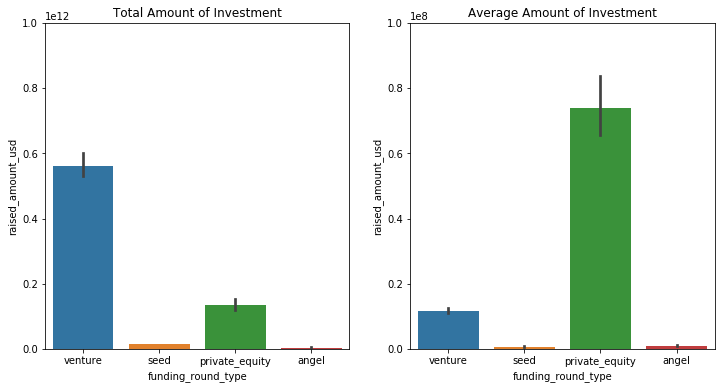

In [51]:
#Separate dtatframe for plots with funding_round_type filtered
master_frame_plot = master_frame_plot[master_frame_plot.funding_round_type.isin(['venture', 'seed', 'angel', 'private_equity'])]

# increase figure size 
plt.figure(figsize=(12, 6))

# subplot 1: statistic=sum
plt.subplot(1, 2, 1)
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame_plot, estimator=np.sum)
plt.title("Total Amount of Investment")
plt.ylim(0, 1000000000000)


# subplot 2: statistic=mean
plt.subplot(1, 2, 2)
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame_plot)
plt.title("Average Amount of Investment")
plt.ylim(0, 100000000)


plt.show()




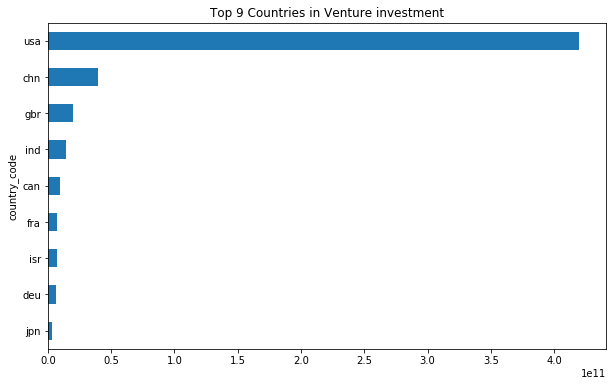

In [109]:
#Plot showing top 9 countries with highest amount of investment in Venture type
plt.figure(figsize=(10,6))
dataplot2.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)[:9].plot(kind='barh')
plt.title('Top 9 Countries in Venture investment')
ax = plt.axis()
plt.axis((ax[0],ax[1],ax[3],ax[2]))
plt.show()


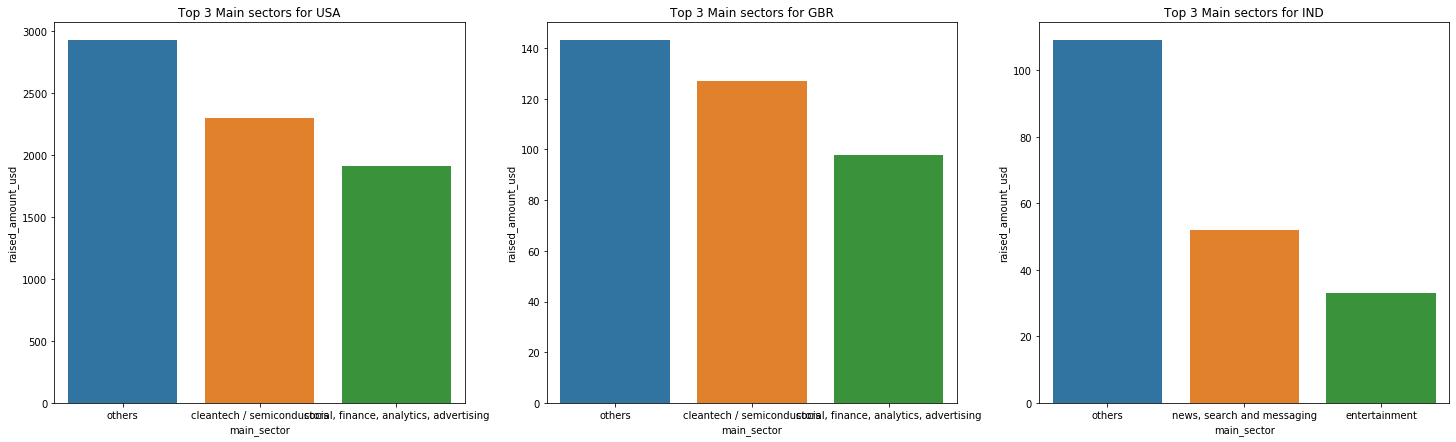

In [115]:
#Plots to show the Top3 Sectors with most number of investments for USA, GBR and IND
# increase figure size 
plt.figure(figsize=(25, 7))

d1plotorder = d1.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False).index.values
d2plotorder = d2.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False).index.values
d3plotorder = d3.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False).index.values

# subplot 1: Top Main Sectors for USA
plt.subplot(1, 3, 1)
sns.barplot(x='main_sector', y='raised_amount_usd', data=d1, estimator=len, order=d1plotorder[0:3])
plt.title("Top 3 Main sectors for USA")


# subplot 2: Top Main Sectors for GBR
plt.subplot(1, 3, 2)
sns.barplot(x='main_sector', y='raised_amount_usd', data=d2, estimator=len, order=d2plotorder[0:3])
plt.title("Top 3 Main sectors for GBR")


# subplot 2: Top Main Sectors for GBR
plt.subplot(1, 3, 3)
sns.barplot(x='main_sector', y='raised_amount_usd', data=d3, estimator=len, order=d3plotorder[0:3])
plt.title("Top 3 Main sectors for IND")
plt.show()



